In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.offline as py

| Feature                             | Description                                                |
|-------------------------------------|------------------------------------------------------------|
| BALANCE                             | Balance amount left in the account to make purchases       |
| BALANCE_FREQUENCY                   | How frequently the balance is updated (score between 0 and 1; 1 = frequently updated, 0 = not frequently updated) |
| PURCHASES                           | Amount of purchases made from the account                  |
| ONEOFF_PURCHASES                    | Maximum purchase amount done in one-go                     |
| INSTALLMENTS_PURCHASES              | Amount of purchases done in installments                   |
| CASH_ADVANCE                        | Cash in advance given by the user                          |
| PURCHASES_FREQUENCY                 | How frequently purchases are being made (score between 0 and 1; 1 = frequently purchased, 0 = not frequently purchased) |
| ONEOFF_PURCHASES_FREQUENCY          | How frequently purchases are happening in one-go (score between 0 and 1; 1 = frequently purchased, 0 = not frequently purchased) |
| PURCHASES_INSTALLMENTS_FREQUENCY    | How frequently purchases in installments are being done (score between 0 and 1; 1 = frequently done, 0 = not frequently done) |
| CASH_ADVANCE_FREQUENCY              | How frequently the cash in advance is being paid           |
| CASH_ADVANCE_TRX                    | Number of transactions made with "Cash in Advance"         |
| PURCHASES_TRX                       | Number of purchase transactions made                        |
| CREDIT_LIMIT                        | Limit of credit card for the user                          |
| PAYMENTS                            | Amount of payment done by the user                         |
| MINIMUM_PAYMENTS                    | Minimum amount of payments made by the user                |
| PRC_FULL_PAYMENT                    | Percent of full payment paid by the user                   |
| TENURE                              | Tenure of credit card service for the user                 |


In [14]:
data = pd.read_csv('Data_CC.csv')
data.drop(['CUST_ID'], axis=1, inplace=True)
print(data.shape)
data

(8950, 17)


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [17]:
data.describe()
# We check if the dataset presents any missing values
data.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [18]:
# Since we have found multiple missing values, we decided to replace them with the mean of the column, since it is the most common method to deal with missing values and therefore should not affect the results of the analysis, being the most conservative approach.
data.fillna(data.mean(), inplace=True)
data.isnull().sum()




BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

<Axes: >

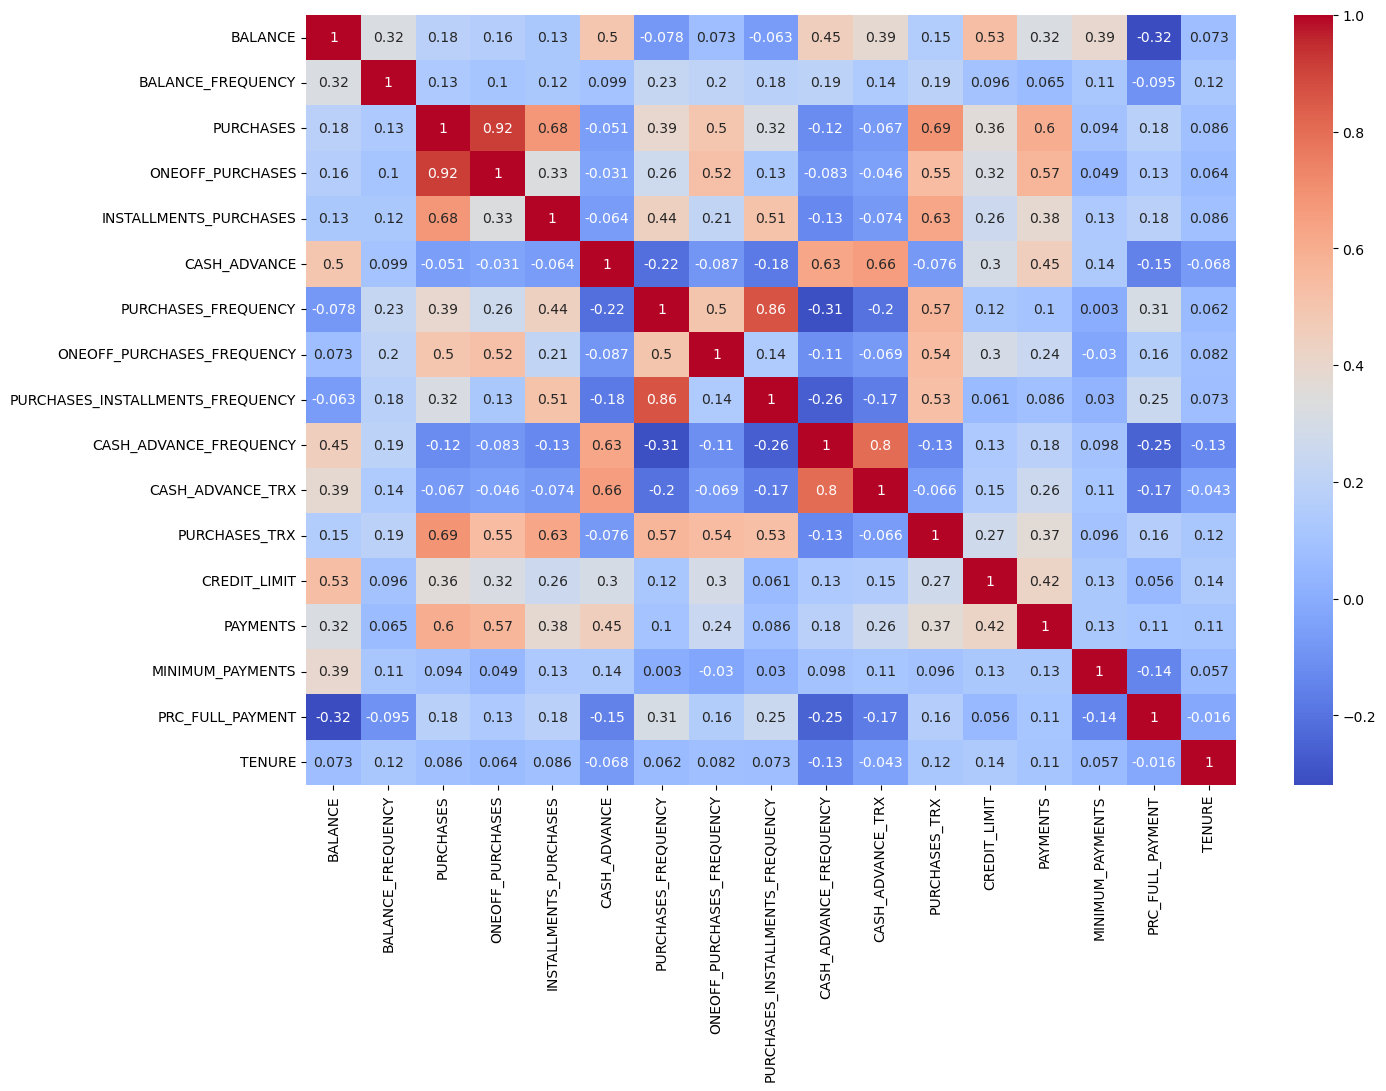

In [26]:
#Correlation matrix to check for multicollinearity not mirrored
correlation_matrix = data.corr()
plt.figure(figsize=(15,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')



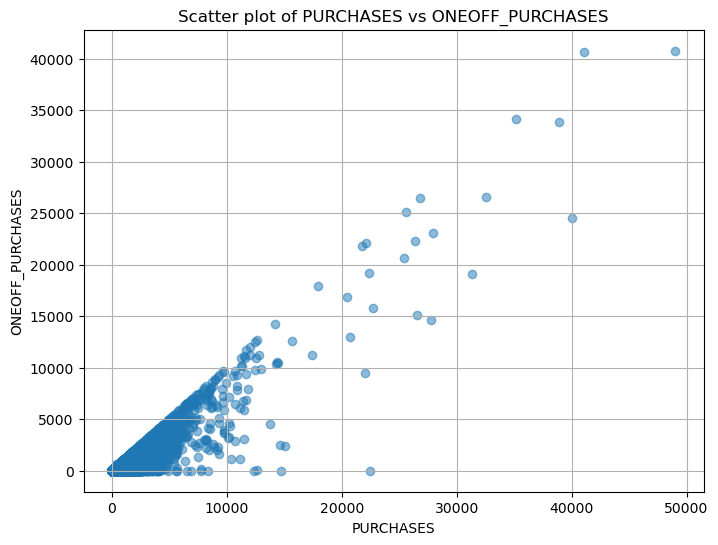

In [32]:
# Assuming your dataset is stored in a DataFrame named df, 
# Extract the selected features
selected_features = ['PURCHASES', 'ONEOFF_PURCHASES']
data_subset = data[selected_features]

# Plot the scatterplot
plt.figure(figsize=(8, 6))
plt.scatter(data_subset['PURCHASES'], data_subset['ONEOFF_PURCHASES'], alpha=0.5)
plt.title('Scatter plot of PURCHASES vs ONEOFF_PURCHASES')
plt.xlabel('PURCHASES')
plt.ylabel('ONEOFF_PURCHASES')
plt.grid(True)
plt.show()

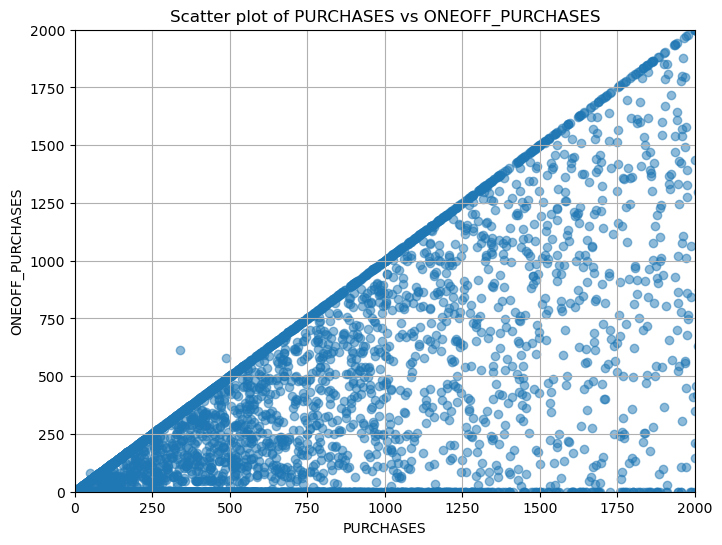

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your dataset is stored in a DataFrame named df
# Extract the selected features
selected_features = ['PURCHASES', 'ONEOFF_PURCHASES']
data_subset = data[selected_features]

# Plot the scatterplot
plt.figure(figsize=(8, 6))
plt.scatter(data_subset['PURCHASES'], data_subset['ONEOFF_PURCHASES'], alpha=0.5)
plt.title('Scatter plot of PURCHASES vs ONEOFF_PURCHASES')
plt.xlabel('PURCHASES')
plt.ylabel('ONEOFF_PURCHASES')

# Zoom in by setting axis limits
plt.xlim(0, 2000)  # Adjust the limits as needed
plt.ylim(0, 2000)  # Adjust the limits as needed

plt.grid(True)
plt.show()


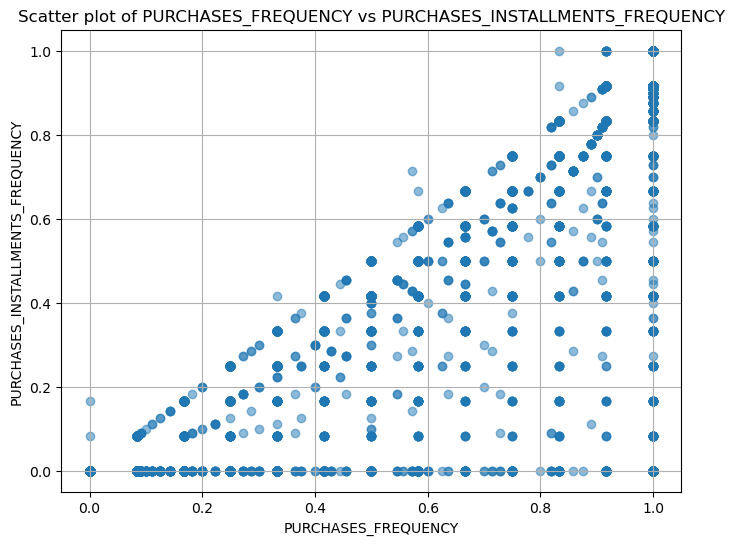

In [35]:
# Assuming your dataset is stored in a DataFrame named df, 
# Extract the selected features
selected_features = ['PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY']
data_subset = data[selected_features]

# Plot the scatterplot
plt.figure(figsize=(8, 6))
plt.scatter(data_subset['PURCHASES_FREQUENCY'], data_subset['PURCHASES_INSTALLMENTS_FREQUENCY'], alpha=0.5)
plt.title('Scatter plot of PURCHASES_FREQUENCY vs PURCHASES_INSTALLMENTS_FREQUENCY')
plt.xlabel('PURCHASES_FREQUENCY')
plt.ylabel('PURCHASES_INSTALLMENTS_FREQUENCY')
plt.grid(True)
plt.show()

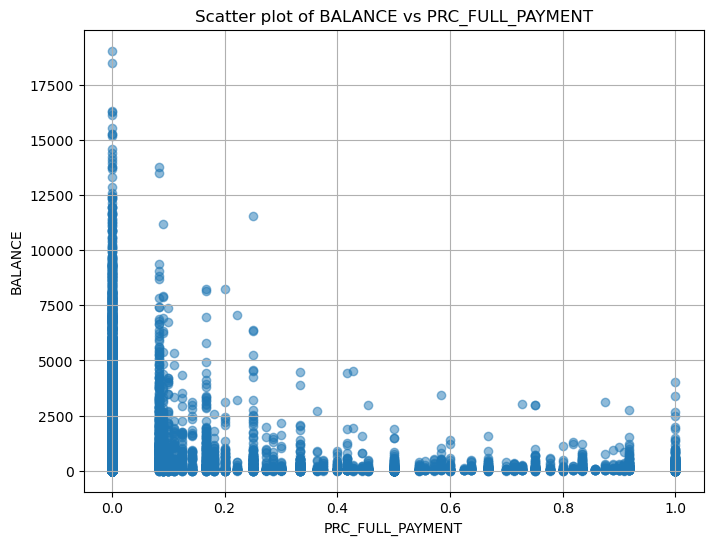

In [38]:

# Assuming your dataset is stored in a DataFrame named df, 
# Extract the selected features
selected_features = ['PRC_FULL_PAYMENT', 'BALANCE']
data_subset = data[selected_features]

# Plot the scatterplot
plt.figure(figsize=(8, 6))
plt.scatter(data_subset['PRC_FULL_PAYMENT'], data_subset['BALANCE'], alpha=0.5)
plt.title('Scatter plot of BALANCE vs PRC_FULL_PAYMENT')
plt.xlabel('PRC_FULL_PAYMENT')
plt.ylabel('BALANCE')
plt.grid(True)
plt.show()